In [10]:
import os
import numpy as np
from utils import utils
import matplotlib.pyplot as plt

In [11]:
def convolve_im(im: np.array,
                title: str = "",):
    
    # Define figure
    fig, ax = plt.subplots(nrows=1, ncols=4)
    if title:
        fig.suptitle(title, fontsize=16)
    for axis in ax.ravel(): 
        axis.set_axis_off()
    fig.set_size_inches((20,4))
    # Remember to use cmap=gray!

    # Visualize original image
    ax[0].set_title("Original image")
    ax[0].imshow(im, cmap="gray")

    # Step 1: FFT
    im_fft = np.fft.fft2(im) # Translate im to frequency domain by taking fourier transform
    plot = np.log(np.abs(np.fft.fftshift((im_fft))))
    ax[1].set_title("FFT of image")
    ax[1].imshow(plot, cmap="gray")

    # Step 2: Apply noice reduction to im_fft
    ax[2].set_title("Frequency domain with applied noice reduction")
    noice_reduction = np.fft.fftshift(im_fft)
    noice_reduction[im.shape[0]//2-4:im.shape[0]//2+4, 0:im.shape[1]//2-28] = noice_reduction[im.shape[0]//2-4:im.shape[0]//2+4, im.shape[1]//2+28:-1] = 1
    ax[2].imshow(np.log(np.abs(noice_reduction)), cmap="gray")

    # Step 3: IFFT, result
    conv_result_fft = np.fft.ifft2(np.fft.ifftshift(noice_reduction)) # Take inverse fourier transform for translating back to the spatial domain
    conv_result = np.real(conv_result_fft) # Get the real part of complex number
    ax[3].set_title("Filtered spatial image")
    ax[3].imshow(conv_result, cmap="gray")        

    return conv_result

rows=538 columns=464
Saving image to: data/results/task4c_moon_filtered.png


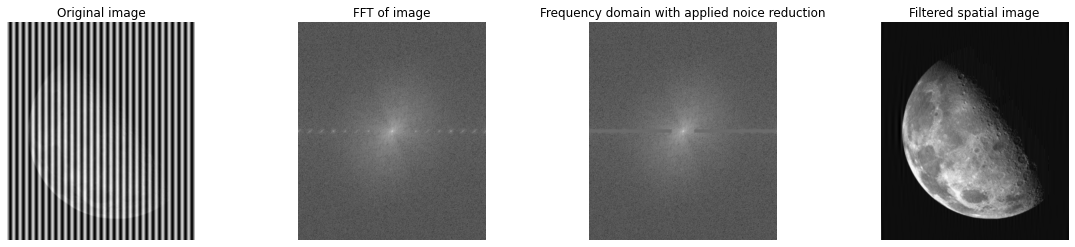

In [12]:
if __name__ == "__main__":
    impath = os.path.join("data/img", "noisy_moon.png")
    im = utils.read_im(impath)
    im = utils.uint8_to_float(im)
    rows, columns = im.shape
    print(f"{rows=} {columns=}")
    
    im_filtered = convolve_im(im)    
    
    utils.save_im("task4c_moon_filtered.png", utils.normalize(im_filtered))